<a href="https://colab.research.google.com/github/JainamSavla/CO2-Emissions-and-Global-Temperature-Impact-Using-Machine-Learning-and-Python/blob/main/CO2_Emission_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries loaded successfully!")
print("📊 Ready to create 10 different graphs!")

✅ Libraries loaded successfully!
📊 Ready to create 10 different graphs!


## 2. Load Data

In [3]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df = pd.read_csv(url)

print(f"📈 Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"📅 Years covered: {df['year'].min()} to {df['year'].max()}")
print(f"🌍 Countries: {df['country'].nunique()}")

# Show first few rows
print("\n📋 First 5 rows:")
df.head()

📈 Dataset loaded: 50411 rows, 79 columns
📅 Years covered: 1750 to 2024
🌍 Countries: 254

📋 First 5 rows:


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Prepare Data for Graphs

In [ ]:
# Clean and prepare data
# Keep only recent years and remove missing data
df_recent = df[df['year'] >= 2000].copy()
df_clean = df_recent[df_recent['co2'].notna()].copy()

# Select top 10 CO2 emitting countries for better visualization
top_countries = df_clean.groupby('country')['co2'].sum().nlargest(10).index.tolist()

print(f"🔄 Cleaned data: {len(df_clean)} rows")
print(f"🏆 Top 10 CO₂ emitting countries: {top_countries}")

---
# 📊 THE 10 GRAPHS
---

## Graph 1: Line Plot - CO₂ Emissions Over Time

🔄 Cleaned data: 6175 rows
🏆 Top 10 CO₂ emitting countries: ['World', 'Non-OECD (GCP)', 'Asia', 'High-income countries', 'Asia (GCP)', 'Upper-middle-income countries', 'OECD (GCP)', 'China', 'North America', 'North America (GCP)']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


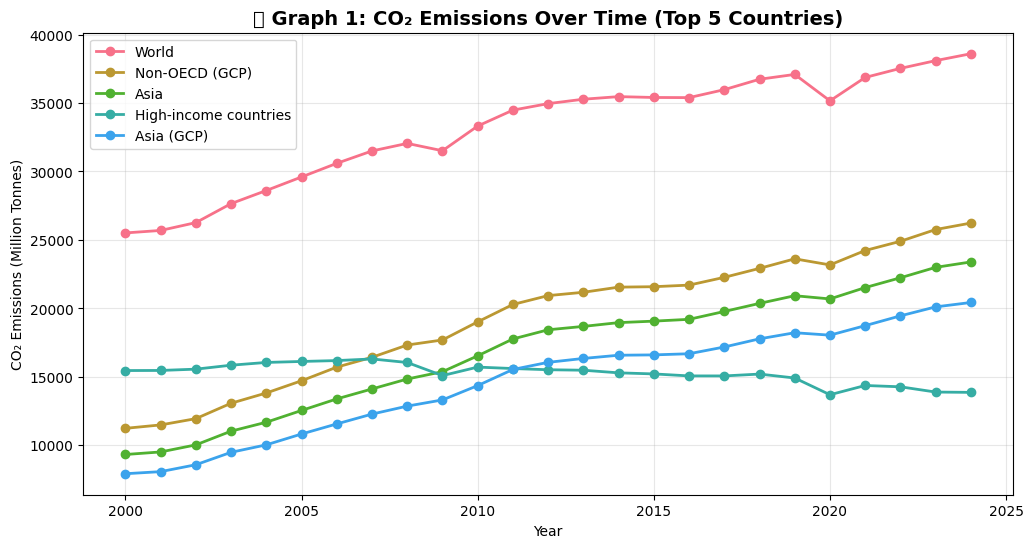

✅ Graph 1 completed: Line Plot


In [5]:
# Clean and prepare data (moved from cell 4d8e7982)
# Keep only recent years and remove missing data
df_recent = df[df['year'] >= 2000].copy()
df_clean = df_recent[df_recent['co2'].notna()].copy()

# Select top 10 CO2 emitting countries for better visualization
top_countries = df_clean.groupby('country')['co2'].sum().nlargest(10).index.tolist()

print(f"🔄 Cleaned data: {len(df_clean)} rows")
print(f"🏆 Top 10 CO₂ emitting countries: {top_countries}")

# Graph 1: Line Plot
plt.figure(figsize=(12, 6))

# Plot top 5 countries
for country in top_countries[:5]:
    country_data = df_clean[df_clean['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], marker='o', linewidth=2, label=country)

plt.title('📈 Graph 1: CO₂ Emissions Over Time (Top 5 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Graph 1 completed: Line Plot")

## Graph 2: Bar Chart - Total CO₂ by Country

/tmp/ipython-input-3277233124.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


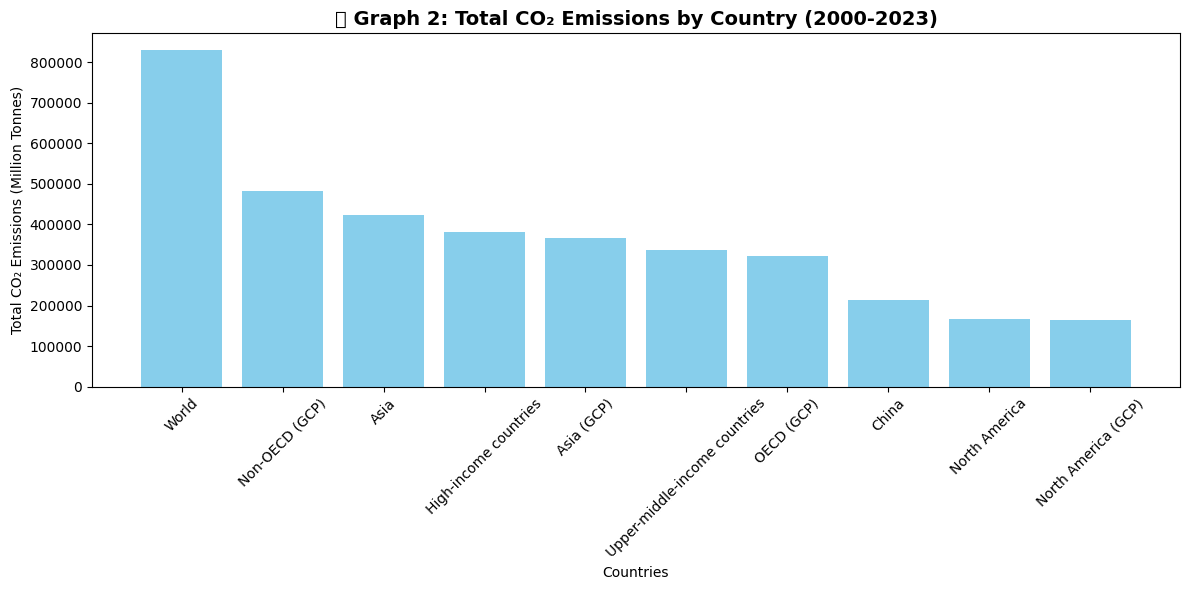

✅ Graph 2 completed: Bar Chart


In [6]:
# Graph 2: Bar Chart
plt.figure(figsize=(12, 6))

# Calculate total CO2 by country
total_co2 = df_clean.groupby('country')['co2'].sum().nlargest(10)

plt.bar(range(len(total_co2)), total_co2.values, color='skyblue')
plt.title('📊 Graph 2: Total CO₂ Emissions by Country (2000-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Total CO₂ Emissions (Million Tonnes)')
plt.xticks(range(len(total_co2)), total_co2.index, rotation=45)
plt.tight_layout()
plt.show()

print("✅ Graph 2 completed: Bar Chart")

## Graph 3: Histogram - Distribution of CO₂ Emissions

In [ ]:
# Graph 3: Histogram
plt.figure(figsize=(10, 6))

# Create histogram of CO2 values
plt.hist(df_clean['co2'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('📊 Graph 3: Distribution of CO₂ Emissions', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ Emissions (Million Tonnes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Graph 3 completed: Histogram")

## Graph 4: Scatter Plot - CO₂ vs Population

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


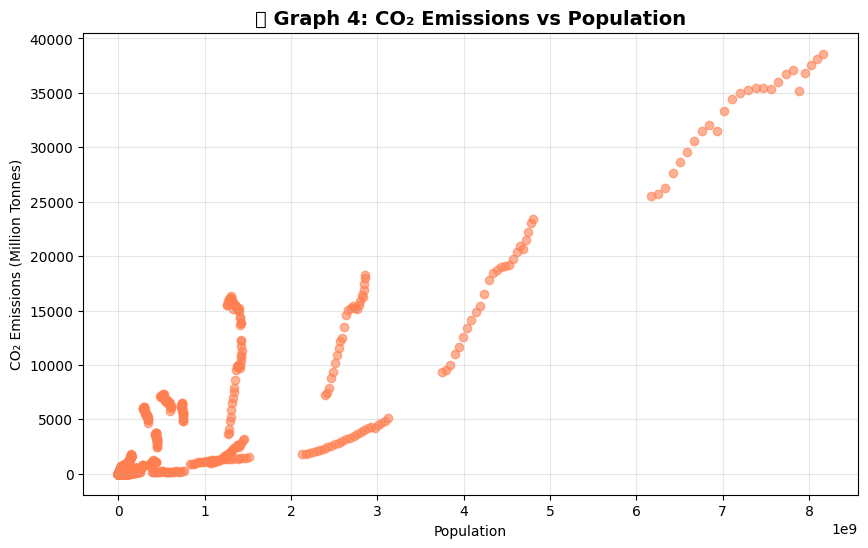

✅ Graph 4 completed: Scatter Plot


In [7]:
# Graph 4: Scatter Plot
plt.figure(figsize=(10, 6))

# Filter data with both CO2 and population data
scatter_data = df_clean[df_clean['population'].notna()]

plt.scatter(scatter_data['population'], scatter_data['co2'], alpha=0.6, color='coral')
plt.title('🔍 Graph 4: CO₂ Emissions vs Population', fontsize=14, fontweight='bold')
plt.xlabel('Population')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Graph 4 completed: Scatter Plot")

## Graph 5: Pie Chart - CO₂ Share by Top Countries

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


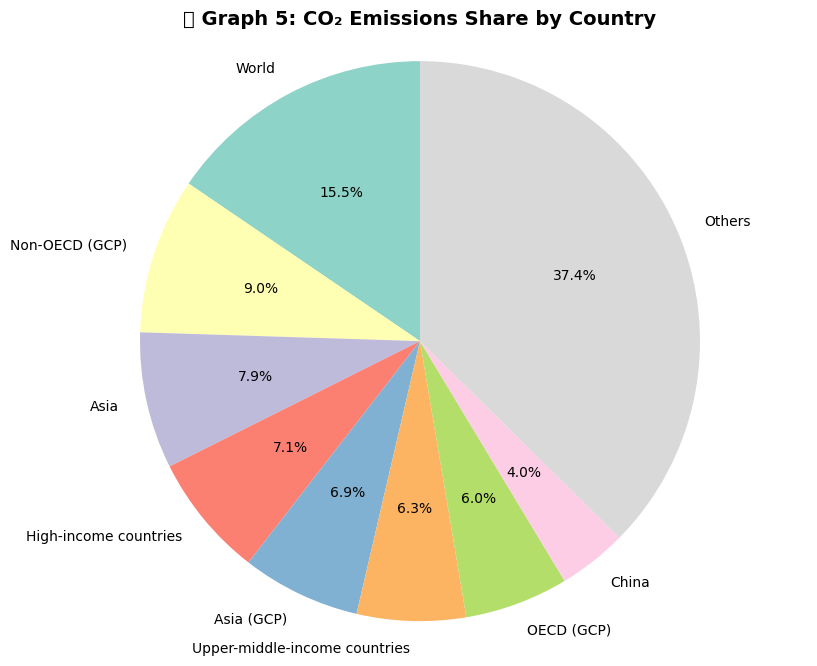

✅ Graph 5 completed: Pie Chart


In [8]:
# Graph 5: Pie Chart
plt.figure(figsize=(10, 8))

# Get top 8 countries for pie chart
top_8_co2 = df_clean.groupby('country')['co2'].sum().nlargest(8)
others = df_clean.groupby('country')['co2'].sum().sum() - top_8_co2.sum()

# Add 'Others' category
pie_data = list(top_8_co2.values) + [others]
pie_labels = list(top_8_co2.index) + ['Others']

colors = plt.cm.Set3(range(len(pie_data)))
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('🥧 Graph 5: CO₂ Emissions Share by Country', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

print("✅ Graph 5 completed: Pie Chart")

## Graph 6: Box Plot - CO₂ Distribution by Continent

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


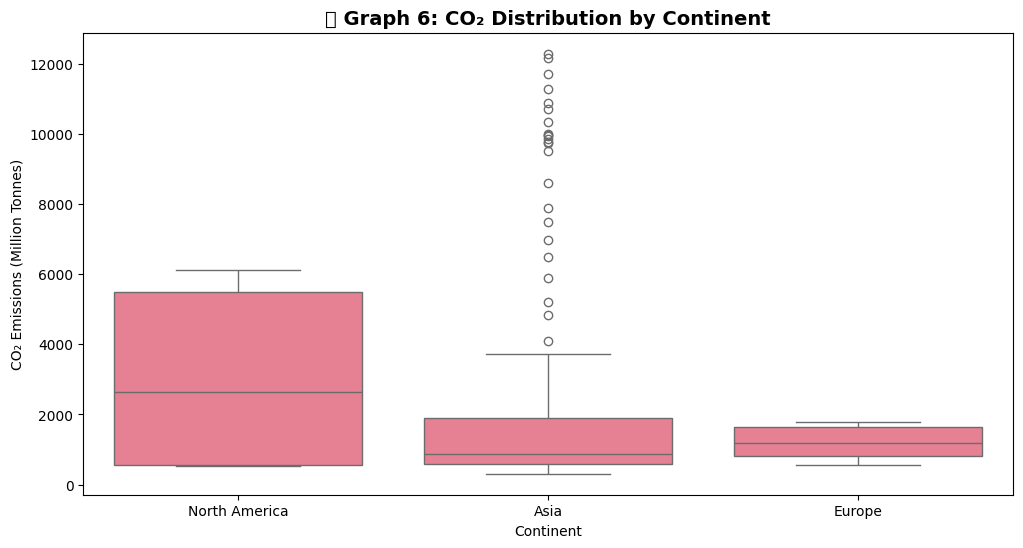

✅ Graph 6 completed: Box Plot


In [9]:
# Graph 6: Box Plot
plt.figure(figsize=(12, 6))

# Create simple continent mapping for demonstration
continent_map = {
    'China': 'Asia',
    'United States': 'North America',
    'India': 'Asia',
    'Russia': 'Europe',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'South Korea': 'Asia',
    'Canada': 'North America',
    'Saudi Arabia': 'Asia'
}

# Add continent column
df_box = df_clean[df_clean['country'].isin(continent_map.keys())].copy()
df_box['continent'] = df_box['country'].map(continent_map)

# Create box plot
sns.boxplot(data=df_box, x='continent', y='co2')
plt.title('📦 Graph 6: CO₂ Distribution by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.show()

print("✅ Graph 6 completed: Box Plot")

## Graph 7: Area Plot - Cumulative CO₂ Over Time

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


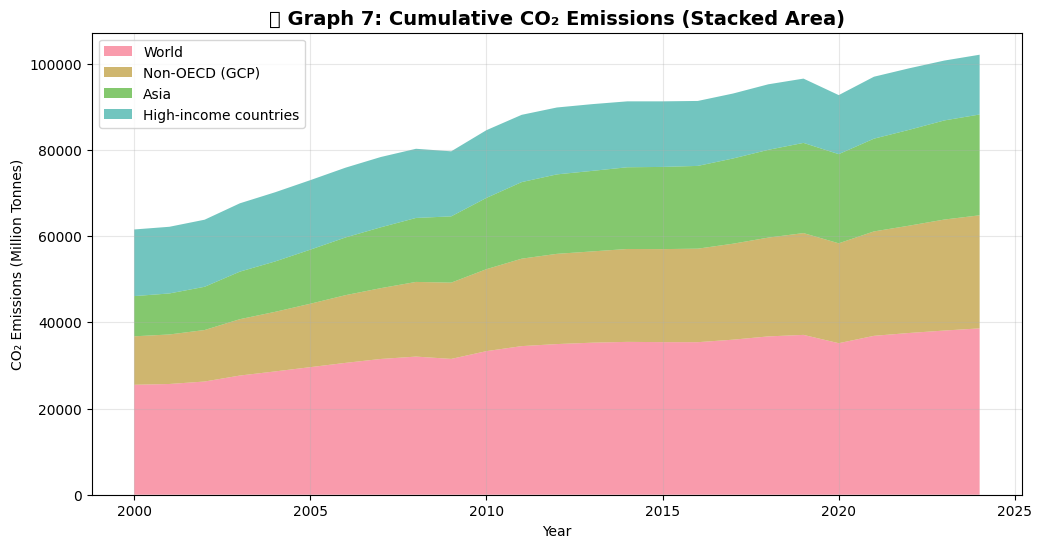

✅ Graph 7 completed: Area Plot


In [10]:
# Graph 7: Area Plot
plt.figure(figsize=(12, 6))

# Prepare data for area plot
area_countries = top_countries[:4]  # Top 4 for clarity
area_data = []

for country in area_countries:
    country_data = df_clean[df_clean['country'] == country].sort_values('year')
    area_data.append(country_data['co2'].values)

years = df_clean[df_clean['country'] == area_countries[0]].sort_values('year')['year'].values

# Create stacked area plot
plt.stackplot(years, *area_data, labels=area_countries, alpha=0.7)
plt.title('🏔️ Graph 7: Cumulative CO₂ Emissions (Stacked Area)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Graph 7 completed: Area Plot")

## Graph 8: Heatmap - CO₂ by Country and Year

/tmp/ipython-input-4242914916.py:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


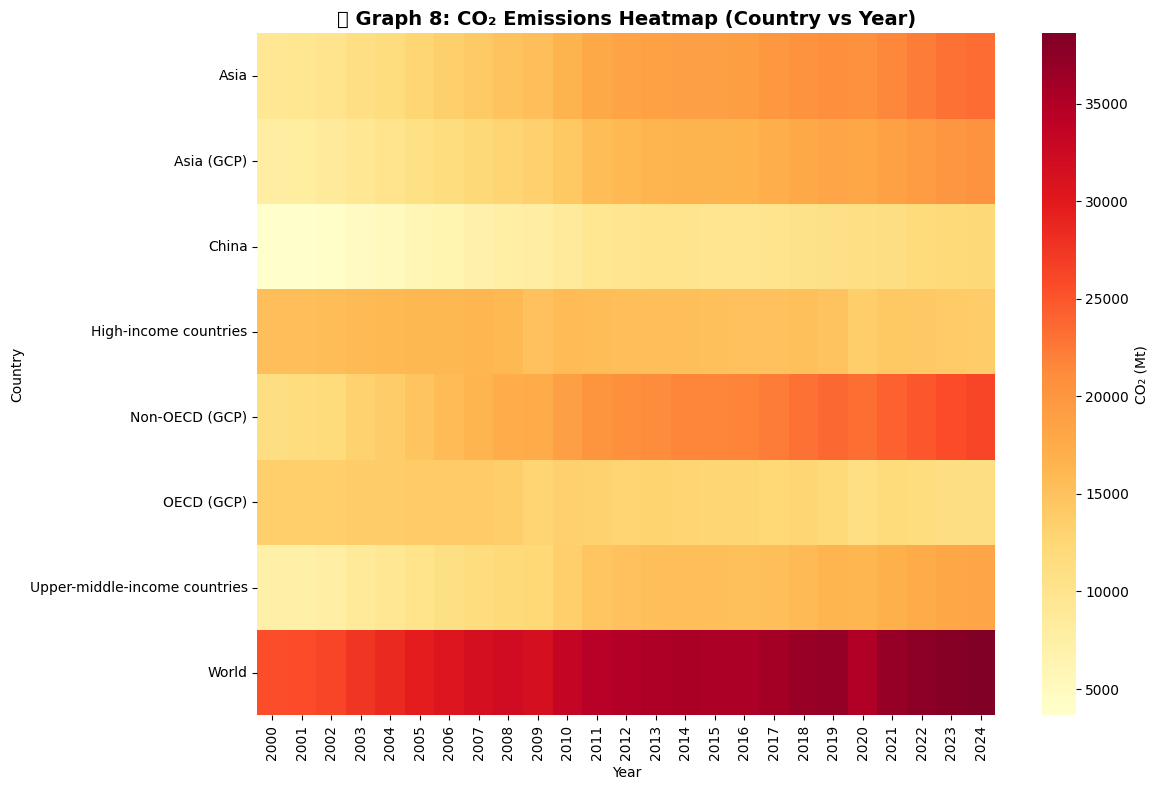

✅ Graph 8 completed: Heatmap


In [11]:
# Graph 8: Heatmap
plt.figure(figsize=(12, 8))

# Create pivot table for heatmap
heatmap_data = df_clean[df_clean['country'].isin(top_countries[:8])]
pivot_data = heatmap_data.pivot_table(values='co2', index='country', columns='year', fill_value=0)

# Create heatmap
sns.heatmap(pivot_data, cmap='YlOrRd', annot=False, fmt='.0f', cbar_kws={'label': 'CO₂ (Mt)'})
plt.title('🔥 Graph 8: CO₂ Emissions Heatmap (Country vs Year)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("✅ Graph 8 completed: Heatmap")

## Graph 9: Horizontal Bar Chart - CO₂ Per Capita

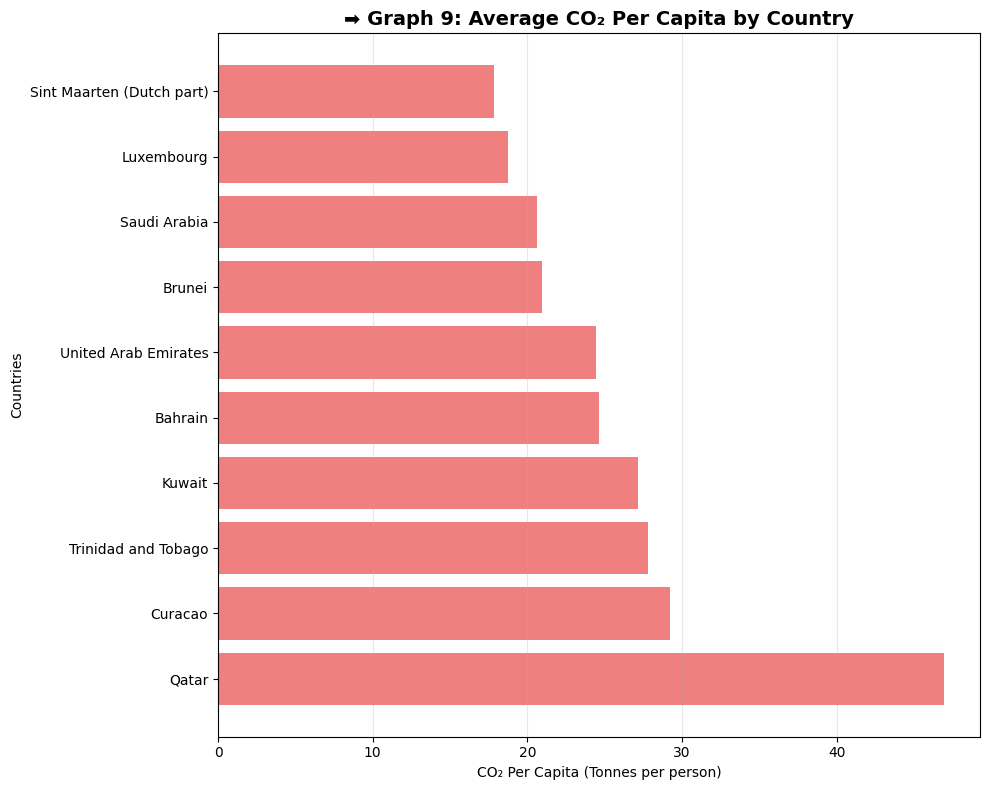

✅ Graph 9 completed: Horizontal Bar Chart


In [12]:
# Graph 9: Horizontal Bar Chart
plt.figure(figsize=(10, 8))

# Calculate average CO2 per capita
per_capita_data = df_clean[df_clean['co2_per_capita'].notna()]
avg_per_capita = per_capita_data.groupby('country')['co2_per_capita'].mean().nlargest(10)

# Create horizontal bar chart
plt.barh(range(len(avg_per_capita)), avg_per_capita.values, color='lightcoral')
plt.title('➡️ Graph 9: Average CO₂ Per Capita by Country', fontsize=14, fontweight='bold')
plt.xlabel('CO₂ Per Capita (Tonnes per person)')
plt.ylabel('Countries')
plt.yticks(range(len(avg_per_capita)), avg_per_capita.index)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("✅ Graph 9 completed: Horizontal Bar Chart")

## Graph 10: Multi-plot Dashboard

/tmp/ipython-input-655103039.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


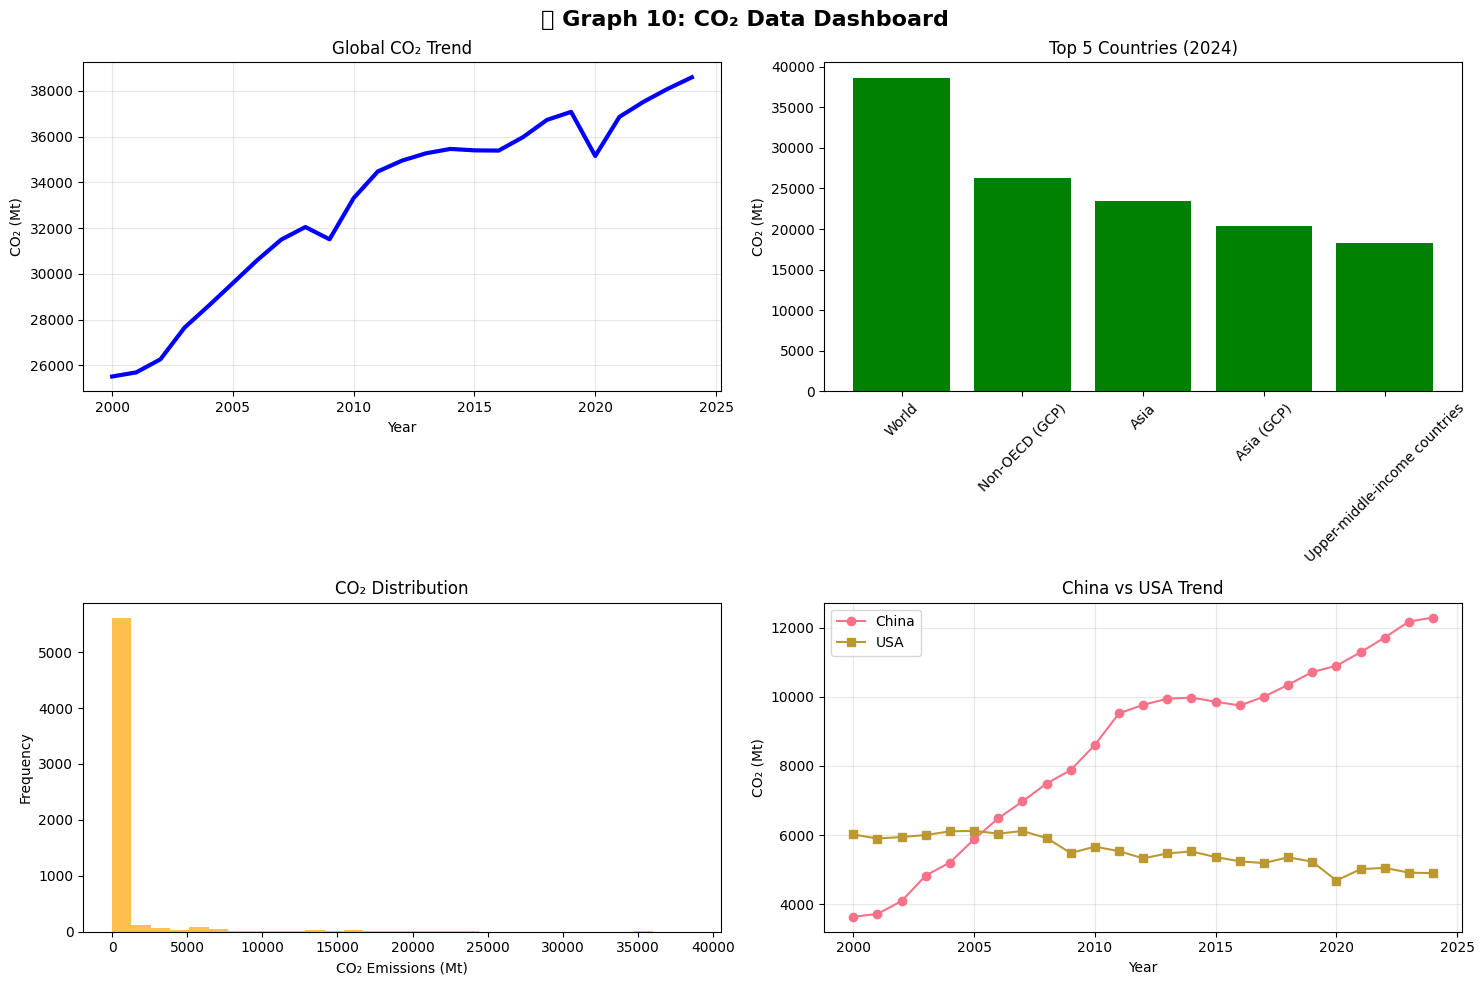

✅ Graph 10 completed: Multi-plot Dashboard


In [13]:
# Graph 10: Multi-plot Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📈 Graph 10: CO₂ Data Dashboard', fontsize=16, fontweight='bold')

# Subplot 1: Total emissions trend
world_data = df_clean[df_clean['country'] == 'World']
if not world_data.empty:
    axes[0, 0].plot(world_data['year'], world_data['co2'], color='blue', linewidth=3)
    axes[0, 0].set_title('Global CO₂ Trend')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('CO₂ (Mt)')
    axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Top 5 countries comparison
latest_year = df_clean['year'].max()
latest_data = df_clean[df_clean['year'] == latest_year].nlargest(5, 'co2')
axes[0, 1].bar(latest_data['country'], latest_data['co2'], color='green')
axes[0, 1].set_title(f'Top 5 Countries ({latest_year})')
axes[0, 1].set_ylabel('CO₂ (Mt)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Distribution
axes[1, 0].hist(df_clean['co2'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('CO₂ Distribution')
axes[1, 0].set_xlabel('CO₂ Emissions (Mt)')
axes[1, 0].set_ylabel('Frequency')

# Subplot 4: Growth over time
china_data = df_clean[df_clean['country'] == 'China']
usa_data = df_clean[df_clean['country'] == 'United States']

axes[1, 1].plot(china_data['year'], china_data['co2'], label='China', marker='o')
axes[1, 1].plot(usa_data['year'], usa_data['co2'], label='USA', marker='s')
axes[1, 1].set_title('China vs USA Trend')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('CO₂ (Mt)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Graph 10 completed: Multi-plot Dashboard")

---
# 🎉 PROJECT COMPLETE!

## ✅ You've successfully created 10 different types of graphs:

1. **📈 Line Plot** - CO₂ trends over time
2. **📊 Bar Chart** - Total emissions by country  
3. **📊 Histogram** - Distribution of CO₂ values
4. **🔍 Scatter Plot** - CO₂ vs Population relationship
5. **🥧 Pie Chart** - CO₂ share by countries
6. **📦 Box Plot** - CO₂ distribution by continent
7. **🏔️ Area Plot** - Cumulative emissions (stacked)
8. **🔥 Heatmap** - Country vs Year CO₂ matrix
9. **➡️ Horizontal Bar Chart** - CO₂ per capita ranking
10. **📈 Dashboard** - Multiple plots in one view

## 🎯 What you learned:
- Loading and cleaning data with pandas
- Creating various visualization types with matplotlib and seaborn
- Data grouping, filtering, and aggregation
- Plot customization (colors, labels, titles)
- Dashboard creation with subplots

## 🚀 Next steps:
- Try different countries or time periods
- Add more interactive features
- Experiment with different color schemes
- Create animated plots
- Add more data sources

**Great job completing this data visualization project! 📊🎉**

## Graph 11: Choropleth Map - CO₂ Emissions by Country (Interactive)

This map shows CO₂ emissions by country for the most recent year in the dataset. You can zoom, hover, and explore interactively!

> **Note:** You need to have `plotly` installed. If not, run `pip install plotly` in a cell or terminal.

In [14]:
# Graph 11: Choropleth Map (Interactive)
try:
    import plotly.express as px
    # Prepare data for the most recent year
    latest_year = df_clean['year'].max()
    map_data = df_clean[df_clean['year'] == latest_year]
    # Use ISO codes for better mapping
    if 'iso_code' in map_data.columns:
        map_data = map_data[map_data['iso_code'].notna()]
        fig = px.choropleth(
            map_data,
            locations='iso_code',
            color='co2',
            hover_name='country',
            color_continuous_scale='Reds',
            title=f'🌍 Graph 11: CO₂ Emissions by Country ({latest_year})',
            labels={'co2': 'CO₂ Emissions (Mt)'},
            projection='natural earth'
        )
        fig.update_geos(showcoastlines=True, showland=True, fitbounds="locations")
        fig.show()
        print("✅ Graph 11 completed: Choropleth Map (Interactive)")
    else:
        print("❌ ISO country codes not found in data. Choropleth map cannot be created.")
except ImportError:
    print("❌ Plotly is not installed. Run 'pip install plotly' to enable this feature.")

✅ Graph 11 completed: Choropleth Map (Interactive)
